In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pds
import numpy as np
from itertools import groupby
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
# load cognitive functioning questionnaire data
# online documentation: https://wwwn.cdc.gov/Nchs/Nhanes/2011-2012/CFQ_G.htm
cfq_df = pds.read_table('../data/CFQ_G_cognitive_functioning.tsv', index_col='SEQN')
cfq_df.head()

,CFASTAT,CFALANG,CFDCCS,CFDCRNC,CFDCST1,CFDCST2,CFDCST3,CFDCSR,CFDCIT1,CFDCIT2,CFDCIT3,CFDCIR,CFDAPP,CFDARNC,CFDAST,CFDDPP,CFDDRNC,CFDDS
SEQN,,,,,,,,,,,,,,,,,,
62174,1,1.0,1.0,NaN,3.0,6.0,7.0,5.0,0.0,0.0,0.0,1.0,1.0,NaN,18.0,1.0,NaN,33.0
62178,1,1.0,1.0,NaN,3.0,5.0,5.0,3.0,0.0,0.0,0.0,1.0,1.0,NaN,12.0,1.0,NaN,38.0
62191,1,1.0,1.0,NaN,4.0,5.0,7.0,5.0,0.0,0.0,0.0,0.0,1.0,NaN,17.0,1.0,NaN,26.0
62209,1,2.0,1.0,NaN,3.0,3.0,5.0,3.0,0.0,0.0,0.0,0.0,1.0,NaN,15.0,2.0,NaN,NaN
62215,1,1.0,1.0,NaN,5.0,8.0,8.0,7.0,0.0,0.0,0.0,0.0,1.0,NaN,15.0,1.0,NaN,47.0


In [5]:
len(cfq_df)

1687

In [6]:
# filter for patients that completed all 4 of the CERAD tests (CFDCCS)
# for reference
# 1: Four completed recalls (count: 1451)
# 2: One to three completed recalls (count: 17)
# 3: Not done (count: 42)
# 4: Missing (count: 177)
cfq_df = cfq_df.query("CFDCCS == 1")
len(cfq_df)

1451

In [7]:
# filter for patients completed the Animal Fluency: Sample Practice Pretest (CFDAPP)
# for reference
# Code  Value       Count
# 1 	Passed 	    1449
# 2 	Failed 	    7 	
# 3 	Not done 	54 	
# . 	Missing 	177 
cfq_df = cfq_df.query("CFDAPP == 1")
len(cfq_df)

1429

In [8]:
## filter for patients that completed the Digit Symbol: Sample Practice Pretest (CFDDPP)  
# for reference  
# Code    Description 	Count 	  
# 1       Passed 	        1422 	  
# 2 	  Failed 	        52 	  
# 3 	  Not done 	    36 	  
# . 	  Missing 	    177  
cfq_df = cfq_df.query("CFDDPP == 1")
len(cfq_df)

1361

In [9]:
# create subset of scores
# CFDCSR - CERAD: Score Delayed Recall
# CFDCIR - CERAD: Intrusion word count Recall
# CFDAST - Animal Fluency: Score Total
# CFDDS - Digit Symbol: Score
score_df = cfq_df[['CFDCSR', 'CFDCIR', 'CFDAST', 'CFDDS']]
score_df.head()

,CFDCSR,CFDCIR,CFDAST,CFDDS
SEQN,,,,
62174,5.0,1.0,18.0,33.0
62178,3.0,1.0,12.0,38.0
62191,5.0,0.0,17.0,26.0
62215,7.0,0.0,15.0,47.0
62217,4.0,0.0,9.0,25.0


In [10]:
score_df.CFDCIR.value_counts()

0.0     1123
1.0      174
2.0       43
3.0       17
8.0        1
5.0        1
10.0       1
6.0        1
Name: CFDCIR, dtype: int64

In [11]:
score_df.nunique()

CFDCSR    11
CFDCIR     8
CFDAST    36
CFDDS     92
dtype: int64

In [12]:
len(score_df.dropna()) # 1361, same as above

1361

In [13]:
# score_df[['CFDCSR', 'CFDCIR', 'CFDAST', 'CFDDS']].plot.bar()

In [14]:
temp_df = score_df.head()
temp_df

,CFDCSR,CFDCIR,CFDAST,CFDDS
SEQN,,,,
62174,5.0,1.0,18.0,33.0
62178,3.0,1.0,12.0,38.0
62191,5.0,0.0,17.0,26.0
62215,7.0,0.0,15.0,47.0
62217,4.0,0.0,9.0,25.0


In [36]:
# standardize scores with sklearn (other options are available too)
std_scaler = StandardScaler()
norm_df = pds.DataFrame(std_scaler.fit_transform(temp_df), columns=temp_df.columns, index=temp_df.index)
norm_df

,CFDCSR,CFDCIR,CFDAST,CFDDS
SEQN,,,,
62174,0.150756,1.224745,1.147832,-0.098354
62178,-1.356801,1.224745,-0.664534,0.516359
62191,0.150756,-0.816497,0.845771,-0.958952
62215,1.658312,-0.816497,0.241649,1.622842
62217,-0.603023,-0.816497,-1.570717,-1.081895


In [37]:
norm_name_map = {'CFDCSR': 'z_CFDCSR', 'CFDCIR': 'z_CFDCIR', 'CFDAST': 'z_CFDAST', 'CFDDS': 'z_CFDDS'}
norm_df = norm_df.rename(columns=norm_name_map)

In [38]:
norm_df['z_total'] = norm_df.sum(axis=1).round(2)
norm_df

,z_CFDCSR,z_CFDCIR,z_CFDAST,z_CFDDS,z_total
SEQN,,,,,
62174,0.150756,1.224745,1.147832,-0.098354,2.42
62178,-1.356801,1.224745,-0.664534,0.516359,-0.28
62191,0.150756,-0.816497,0.845771,-0.958952,-0.78
62215,1.658312,-0.816497,0.241649,1.622842,2.71
62217,-0.603023,-0.816497,-1.570717,-1.081895,-4.07


In [40]:
temp_df.merge(norm_df, how='inner', on='SEQN')

,CFDCSR,CFDCIR,CFDAST,CFDDS,z_CFDCSR,z_CFDCIR,z_CFDAST,z_CFDDS,z_total
SEQN,,,,,,,,,
62174,5.0,1.0,18.0,33.0,0.150756,1.224745,1.147832,-0.098354,2.42
62178,3.0,1.0,12.0,38.0,-1.356801,1.224745,-0.664534,0.516359,-0.28
62191,5.0,0.0,17.0,26.0,0.150756,-0.816497,0.845771,-0.958952,-0.78
62215,7.0,0.0,15.0,47.0,1.658312,-0.816497,0.241649,1.622842,2.71
62217,4.0,0.0,9.0,25.0,-0.603023,-0.816497,-1.570717,-1.081895,-4.07


In [6]:
# merge demographics and scores
merged_df = (
    pds.merge(
        pds.read_table('../refined_data/demographics.tsv',  index_col='SEQN'),
        pds.read_table('../refined_data/cognitive_scores.tsv',  index_col='SEQN'),
        how='inner',
        on='SEQN'
    )
)
merged_df.head()

,RIDAGEYR,RIAGENDR,RIDRETH1,RIDRETH3,DMDMARTL,CFDCSR,CFDCIR,CFDAST,CFDDS,z_CFDCSR,z_CFDCIR,z_CFDAST,z_CFDDS,z_total
SEQN,,,,,,,,,,,,,,
62174,80,1,3,3,1.0,5.0,1.0,18.0,33.0,-0.246575,1.094775,0.288354,-0.688879,0.45
62178,80,1,3,3,2.0,3.0,1.0,12.0,38.0,-1.122787,1.094775,-0.806855,-0.403627,-1.24
62191,70,1,4,4,3.0,5.0,0.0,17.0,26.0,-0.246575,-0.364568,0.105819,-1.088231,-1.59
62215,65,2,3,3,1.0,7.0,0.0,15.0,47.0,0.629636,-0.364568,-0.259250,0.109825,0.12
62217,77,2,1,1,5.0,4.0,0.0,9.0,25.0,-0.684681,-0.364568,-1.354460,-1.145281,-3.55


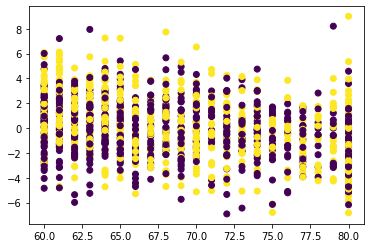

In [27]:
# plot z_total by age
plt.scatter(x=merged_df.RIDAGEYR, y=merged_df.z_total, c=merged_df.RIAGENDR)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


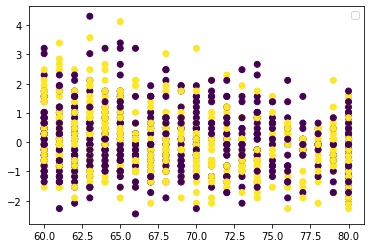

In [28]:
# plot CFDAST - Animal Fluency: Score Total
plt.scatter(x=merged_df.RIDAGEYR, y=merged_df.z_CFDAST, c=merged_df.RIAGENDR)
plt.legend()
plt.show()

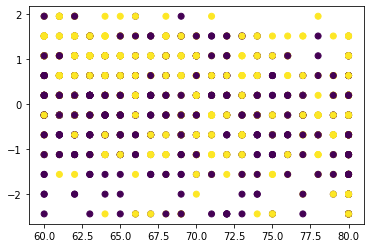

In [23]:
# CFDCSR - CERAD: Score Delayed Recall
plt.scatter(x=merged_df.RIDAGEYR, y=merged_df.z_CFDCSR, c=merged_df.RIAGENDR)
plt.show()

In [11]:
# CFDCSR - CERAD: Score Delayed Recall
# CFDCIR - CERAD: Intrusion word count Recall
# CFDAST - Animal Fluency: Score Total
# CFDDS - Digit Symbol: Score


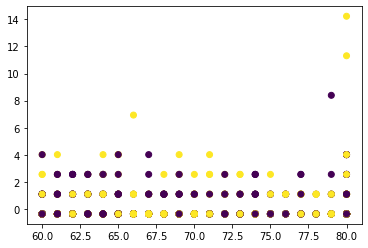

In [22]:
# CFDCIR - CERAD: Intrusion word count Recall
plt.scatter(x=merged_df.RIDAGEYR, y=merged_df.z_CFDCIR, c=merged_df.RIAGENDR)
plt.show()

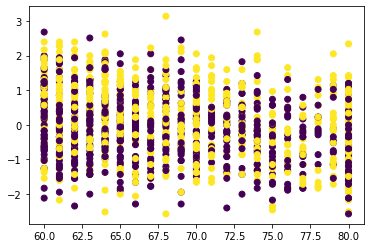

In [21]:
# CFDDS - Digit Symbol: Score
plt.scatter(x=merged_df.RIDAGEYR, y=merged_df.z_CFDDS, c=merged_df.RIAGENDR)
plt.show()